### Generalization of ZMP method.

The work of [Kamal and Harbola](https://doi.org/10.1002/qua.26400) proved that the Hartree potential is not the only Functional that can be used to drive the inversion procedure. Their work showed that a functional that satisfies the condition:

$$
\int \frac{\delta S[n]}{\delta n} - \frac{\delta S[n]}{\delta n} \bigg|_{n_0(r)} (n(r) - n_0(r)) dr \le 0
$$

Can be used as apenalty functional for performing Levy's constrained search. Some of the functionals that can be used are:


$$
S_1[n] = \frac{1}{2} \int \frac{n(r) n(r')}{|r-r'|} dr dr'
$$

$$
S_2[n] =  \int n(r) log(n(r)) dr 
$$

$$
S_3[n] = \frac{1}{0.05+1} \int n^{0.05+1}(r) dr 
$$



The previous two functionals have been included in `n2v` and they can be used to drive the SCF calculation as follows: 

In [1]:
import os
import psi4
import matplotlib.pyplot as plt
import numpy as np
# import numpy_html
psi4.set_options({"save_jk" : True})
psi4.set_memory(int(2.50e9))
psi4.core.clean()

import n2v

#Define Psi4 geometries. Symmetries need to be set to C1. 
Ne = psi4.geometry( 
""" 
0 1
Ne 0.0 0.0 0.0
noreorient
nocom
units bohr
symmetry c1
""" )


#n2v is driven by psi4's reference option. Make sure you set it accordingly. 
psi4.set_options({"reference" : "rhf"})

#Perform a calculation for a target density. 
#Remember that for post scf calculations, Psi4 does not update the density. 
#Thus make sure you obtain something like a dipole in order to do so. 
e, wfn_ne = psi4.properties("hf/ugbs", return_wfn=True, properties=["dipole"], molecule=Ne)

#Define inverter objects for each molcule. Simply use the wnf object from psi4 as an argument. 
ine = n2v.Inverter(wfn_ne)

#Define grid for plotting
npoints=400
x = np.linspace(-0,5,npoints)[:,None]
y = np.linspace(-0,5,npoints)[:,None]
z = np.linspace(-0,5,npoints)[:,None]
grid = np.concatenate((x,y,z), axis=1).T

#### HARTREE FUNCTIONAL
---


Running ZMP:
Iteration:   5 | Self Convergence Error: 4.54004e-06 | DIIS Error: 2.49398e-06
SCF Converged for lambda:    1. Max density difference: 17.14598744776407


(-9.0, 1.0)

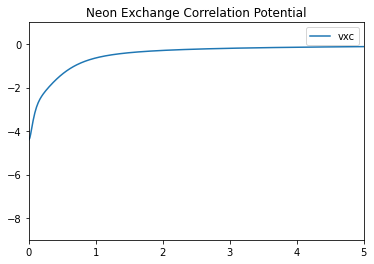

In [19]:
ine.invert("zmp", opt_max_iter=5000, opt_tol=1e-9, zmp_functional='hartree', zmp_lam=[1], guide_potential_components=["fermi_amaldi"])

wfn_ne.Da().np[:] = ine.proto_density_a
wfn_ne.Db().np[:] = ine.proto_density_b
results = ine.on_grid_esp(grid=grid, )
vxc_ne = results[1]

plt.title("Neon Exchange Correlation Potential")
plt.plot(x,  vxc_ne, label="vxc")
plt.legend()
plt.xlim(0,5)
plt.ylim(-9,1)

#### EXPONENTIAL FUNCTIONAL
---


Running ZMP:
Iteration:   5 | Self Convergence Error: 2.83177e-07 | DIIS Error: 4.86203e-07
SCF Converged for lambda:    1. Max density difference: 17.018080728946984


(-9.0, 1.0)

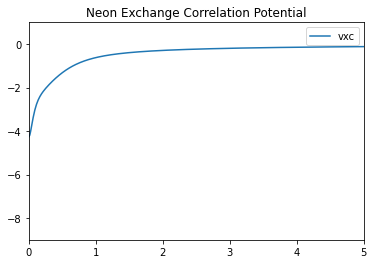

In [20]:
ine.invert("zmp", opt_max_iter=5000, opt_tol=1e-9, zmp_functional='exp', zmp_mixing=0.0, zmp_lam=[1], guide_potential_components=["fermi_amaldi"])

wfn_ne.Da().np[:] = ine.proto_density_a
wfn_ne.Db().np[:] = ine.proto_density_b
results = ine.on_grid_esp(grid=grid, )
vxc_ne = results[1]


plt.title("Neon Exchange Correlation Potential")
plt.plot(x,  vxc_ne, label="vxc")
plt.legend()
plt.xlim(0,5)
plt.ylim(-9,1)

#### LOGARITHMIC FUNCTIONAL
---


Running ZMP:
Iteration:   5 | Self Convergence Error: 4.54004e-06 | DIIS Error: 2.49398e-06
SCF Converged for lambda:    1. Max density difference: 17.14598744776407


(-9.0, 1.0)

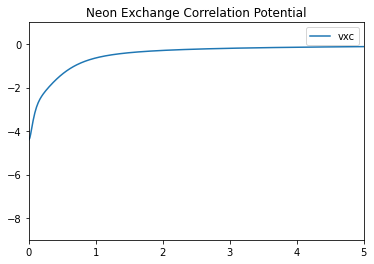

In [21]:
ine.invert("zmp", opt_max_iter=5000, opt_tol=1e-9, zmp_functional='log', zmp_mixing=1.0, zmp_lam=[1], guide_potential_components=["fermi_amaldi"])

wfn_ne.Da().np[:] = ine.proto_density_a
wfn_ne.Db().np[:] = ine.proto_density_b
results = ine.on_grid_esp(grid=grid, )
vxc_ne = results[1]


plt.title("Neon Exchange Correlation Potential")
plt.plot(x,  vxc_ne, label="vxc")
plt.legend()
plt.xlim(0,5)
plt.ylim(-9,1)